# E-tivity 3: Linear Classification

## Name: Martin Power
## ID      : 9939245

# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

# Functions and Classes for Task 3
* Added MyLinClass() to perform Linear Classification
* Added plot_log_reg_boundary() to plot the decision boundary for Logistic Regression
* Added functions from earlier Etivity used to plot boundaryies for PLA, Linear Classifiction etc

In [2]:
def point_on_boundary(weights, x):
    # Return the y-position on the boundary based on given x-position
    return -(weights[0]+weights[1]*x)/weights[2]

In [3]:
def decision_boundary(weights, x_min, x_max):
    # Return two points on the decision boundary
    # MPP return [pointOnBoundary(x_min), pointOnBoundary(x_max)] < -- Code typo
    return [point_on_boundary(weights, x_min), point_on_boundary(weights, x_max)]

In [4]:
def plot_data_w_boundary(X, y, weights):
    # Print the data with a line representing the decision boundary
    y_bound = np.zeros([2])
    X_bound = np.zeros([2])
    
    # Get min and max X Coordinate in the Data Set    
    X_bound[0] = X[:,0].min()
    X_bound[1] = X[:,0].max()

    # Get the Y coordinates for min and max X
    y_bound[0], y_bound[1] = decision_boundary(weights, X_bound[0], X_bound[1])
    
    # Assign colours based on the labels (1,-1) = (steelblue,darkred)
    colors = ['steelblue' if label == 1 else 'darkred' for label in y]
       
    # Plot Training Data
    plt.rcParams["figure.figsize"] = (10, 10) 
    plt.title("Dataset with Decision Boundary")
    plt.scatter(X[:,0], X[:,1], color=colors) 
    
    # Plot Decision Boundary
    plt.plot(X_bound, y_bound, linestyle='dashed', color='black')
    
    plt.show() 

In [5]:
# Function to plot the decision boundary for a logistic regressino
# Code adapted from post at https://stackoverflow.com/questions/28256058/plotting-decision-boundary-of-logistic-regression
def plot_log_reg_boundary(X,y,logreg):
    xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = logreg.predict_proba(grid)[:, 1].reshape(xx.shape)
        
    f, ax = plt.subplots(figsize=(8, 6))
    contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                          vmin=0, vmax=1)
    ax_c = f.colorbar(contour)
    ax_c.set_label("$P(y = 1)$")
    ax_c.set_ticks([0, .25, .5, .75, 1])

    ax.scatter(X[100:,0], X[100:, 1], c=y[100:], s=50,
               cmap="RdBu", vmin=-.2, vmax=1.2,
               edgecolor="white", linewidth=1)

    ax.set(aspect="equal",
           xlim=(-2, 2), ylim=(-2, 2),
           xlabel="$X_1$", ylabel="$X_2$")

#### Class to Perform Homebrew Implementation of Linear Classification
* Class methods are modelled on the methods that a typical sklearn classifier provides

In [6]:
class MyLinClass(object):
    
    def __init__ (self, n_weights):
        self.weights = np.zeros([(n_weights+1),])
        
    def fit(self,X,y):
        X_1s = np.c_[np.ones([X.shape[0],1]),X]
        X_1s_dagger = np.linalg.pinv(X_1s)
        self.weights = np.matmul(X_1s_dagger,y)
        
    def predict(self,X):
        X_1s = np.c_[np.ones([X.shape[0],1]),X]
        yhat = np.sign(np.matmul(X_1s,self.weights))
        
        return yhat
    
    # 1.0 Score indicates 100% Accuracy
    # 0.0 Score indicates 0% Accurcacy
    def score(self,X,y):
        yhat = self.predict(X)
        errors = 0 
        for i in range(len(y)):
            if(y[i]!=yhat[i]):
                errors+=1
                
        return 1-(errors/len(y))

# Generate Dataset

In [7]:
from sklearn.datasets.samples_generator import make_circles
#X, y = make_circles(n_samples=1000, noise = 0.05)
# Add random_state = 108 to make results and conclusions reproducible
X, y = make_circles(n_samples=1000, noise = 0.05, random_state=108)
y = [yy if yy == 1 else -1 for yy in y] 



# Split into Test Set and Train Set

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Plot Training Set

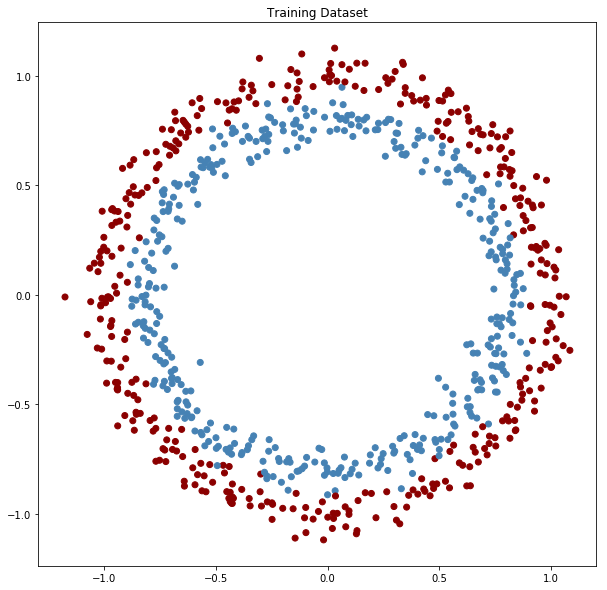

In [9]:
# Assign colours based on the labels (1,-1) = (steelblue,darkred)
colors = ['steelblue' if label == 1 else 'darkred' for label in y_train]

# Plot Training Data
plt.rcParams["figure.figsize"] = (10, 10) 
plt.title("Training Dataset")
plt.scatter(X_train[:,0], X_train[:,1], color=colors) 


plt.show() 

# Linear Regression on Original Dataset

Train Score =  0.51125
Test  Score =  0.45499999999999996


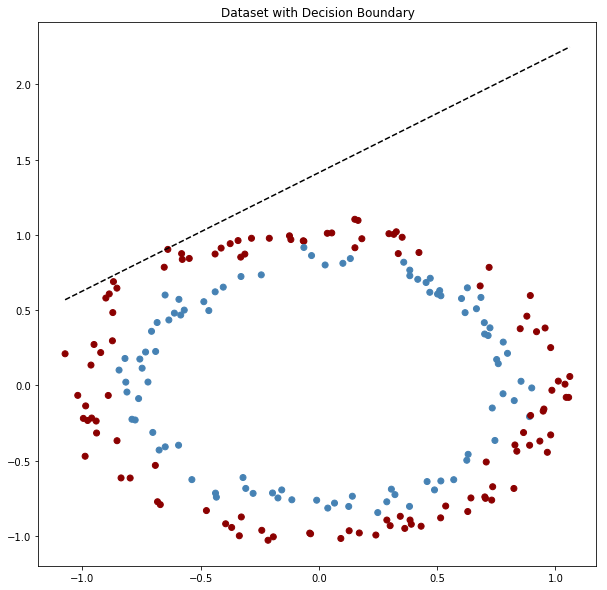

In [10]:
mlc_orig = MyLinClass(X_train.shape[1])
mlc_orig.fit(X_train,y_train)

# Get MSE for Train and Test sets
mlc_orig_train_score = mlc_orig.score(X_train,y_train)
mlc_orig_test_score  = mlc_orig.score(X_test, y_test)

print("Train Score = ",mlc_orig_train_score)
print("Test  Score = ",mlc_orig_test_score)

# Plot data
plot_data_w_boundary(X_test, y_test, mlc_orig.weights)

# Disappointing Results with Linear Regression and Original Dataset
* The decision boundary is a line crosses near the upper part of the circles and only gets 45.5% of the classifications
  correct
* This is very poor performance as just drawing a horizontal line above the entire dataset would have delivered an accuracy
  of 50%
* As the data is not linearly separable, it will not be possible to generate a line as a decision boundary and get acceptable
  performance
* To have a chance of getting decent performance, the dataset needs to be transformed such that it becomes linearly separable
  

# Dataset Transformations
* Figure 3.5 in "Learning from Data" has a similar example where the decision boundary between two datasets looks like a circle. In the book, the features are squared to make them linearly separable. I am going to follow a similiar approach here and call this dataset "X_sqrd"

* I also wanted to see if I could "unroll" the circles. Each (x1,x2) point makes an angle theta with the origin. If this angle is expressed in radians, it can be used to express the length of an arc from the X-axis along the circumference of the circle to the point. This has the effect of "unrolling" the circule circumference into a horizontal line. To ensure both circles do not land on the same line, the y coordinate of the line will be the radius of the circle.
* This transformation to unroll the circule is as follows:
  - x1_trig = arctan(x1/x2)
  - x2_trig = square_root(x1^2 + x2^2)
* This dataset will be referred to as "X_trig"

Visual of Unrolling a Circle Based on Angle in Radians and Length of Arc
Source: https://www.geogebra.org/m/BYFEtXWw


![title](img/unroll_circle.png)

## Trigonometric Transformation of Data

In [11]:
X_trig = np.empty(X.shape)

In [12]:
for i in range(X.shape[0]):
    # The first feature is the angle in radians that the point makes with the origin
    X_trig[i][0] = np.arctan(X[i][1]/X[i][0])
    # The second feature is the distaance from the original point to the origin
    # This is effectively the radius of a circle, centred on the origin, that passes through the point
    X_trig[i][1] = np.sqrt((X[i][1]**2)+(X[i][0]**2))
    #X_trig[i][1] = (X[i][1]**2)+(X[i][0]**2)

#### Split Trigonometric Data into Test Set and Training Set

In [13]:
X_trig_train, X_trig_test, y_trig_train, y_trig_test = train_test_split(X_trig, y, test_size=0.2, random_state=0)

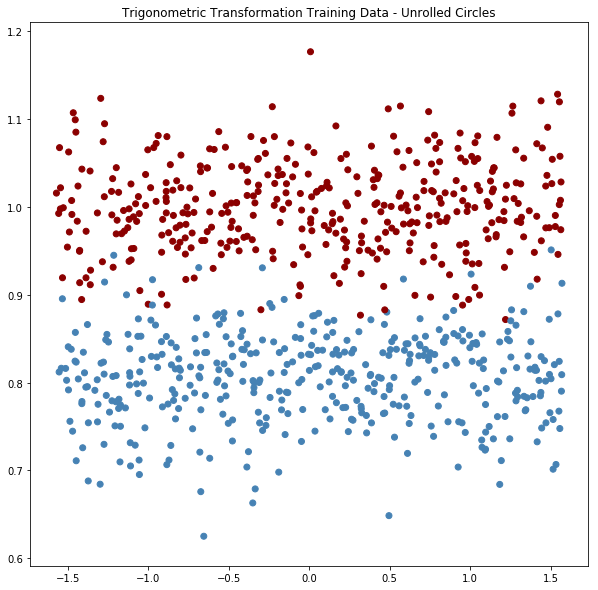

In [14]:
# Assign colours based on the labels (1,-1) = (steelblue,darkred)
colors = ['steelblue' if label == 1 else 'darkred' for label in y_trig_train]

# Plot Training Data
plt.rcParams["figure.figsize"] = (10, 10) 
plt.title("Trigonometric Transformation Training Data - Unrolled Circles")
plt.scatter(X_trig_train[:,0], X_trig_train[:,1], color=colors) 


plt.show() 

#### Linear Regression on Trigonometric Dataset

Train Score =  0.96875
Test  Score =  0.975


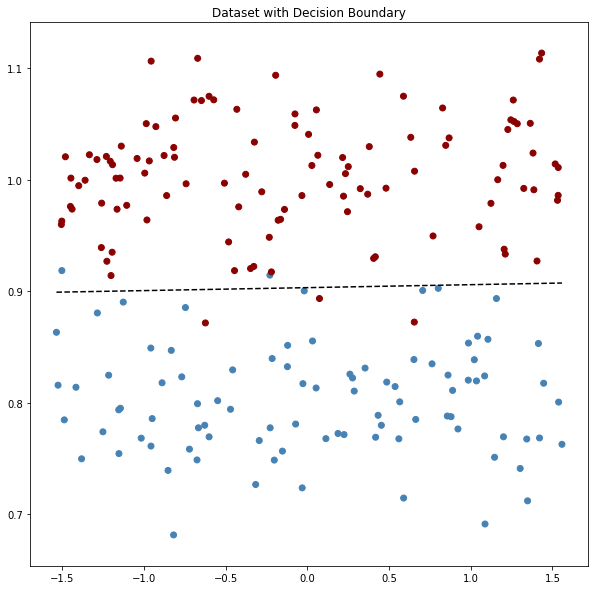

In [15]:
mlc_trig = MyLinClass(X_trig_train.shape[1])
mlc_trig.fit(X_trig_train,y_trig_train)

# Get MSE for Test and Train sets
mlc_trig_train_score = mlc_trig.score(X_trig_train,y_trig_train)
mlc_trig_test_score  = mlc_trig.score(X_trig_test, y_trig_test)

print("Train Score = ",mlc_trig_train_score)
print("Test  Score = ",mlc_trig_test_score)

# Plot test data
plot_data_w_boundary(X_trig_test, y_trig_test, mlc_trig.weights)

### Squared Transformation of Data

In [16]:
X_sqrd = np.empty(X.shape)

In [17]:
for i in range(X.shape[0]):
    # Square X1 and X2
    X_sqrd[i][0] = X[i][0]**2
    X_sqrd[i][1] = X[i][1]**2


#### Split Squared Dataset into Test Set and Training Set

In [18]:
X_sqrd_train, X_sqrd_test, y_sqrd_train, y_sqrd_test = train_test_split(X_sqrd, y, test_size=0.2, random_state=0)

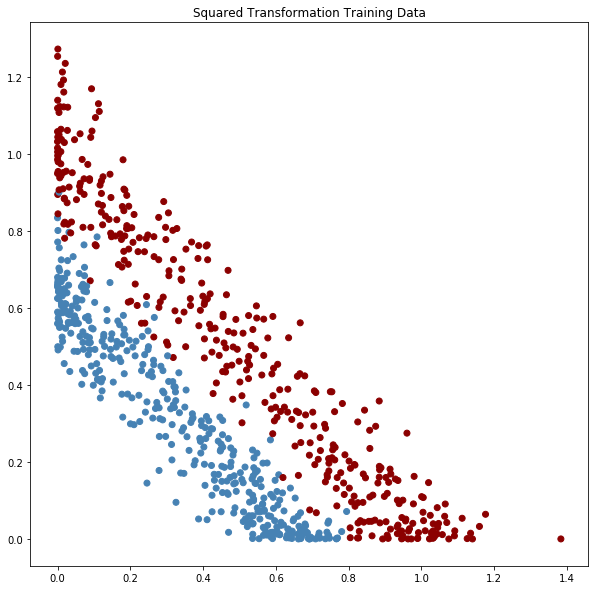

In [19]:
# Assign colours based on the labels (1,-1) = (steelblue,darkred)
colors = ['steelblue' if label == 1 else 'darkred' for label in y_sqrd_train]

# Plot Training Data
plt.rcParams["figure.figsize"] = (10, 10) 
plt.title("Squared Transformation Training Data")
plt.scatter(X_sqrd_train[:,0], X_sqrd_train[:,1], color=colors) 


plt.show() 

#### Linear Regression on Squared Dataset

Train Score =  0.9675
Test  Score =  0.975


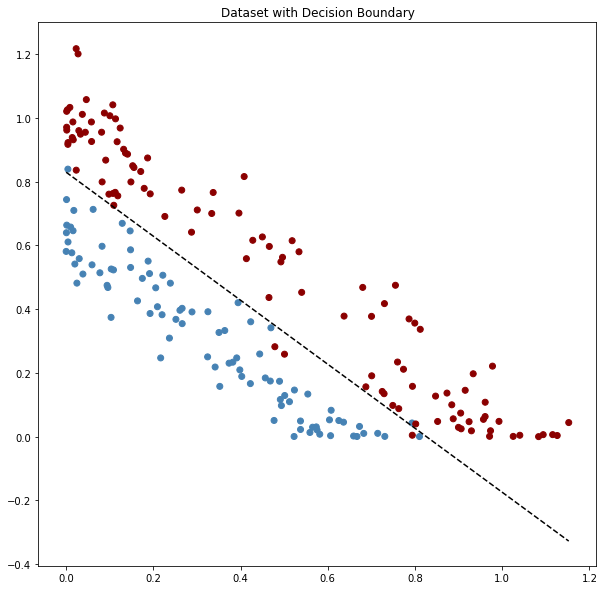

In [20]:
mlc_sqrd = MyLinClass(X_sqrd_train.shape[1])
mlc_sqrd.fit(X_sqrd_train,y_sqrd_train)

# Get MSE for Test and Train Sets
mlc_sqrd_train_score = mlc_sqrd.score(X_sqrd_train,y_sqrd_train)
mlc_sqrd_test_score  = mlc_sqrd.score(X_sqrd_test, y_sqrd_test)

print("Train Score = ",mlc_sqrd_train_score)
print("Test  Score = ",mlc_sqrd_test_score)

# Plot Test Set
plot_data_w_boundary(X_sqrd_test, y_sqrd_test, mlc_sqrd.weights)

# Perform Logistic Regression on Datasets

## Logistic Regression on Original Dataset

Train Score =  0.51125
Test  Score =  0.455


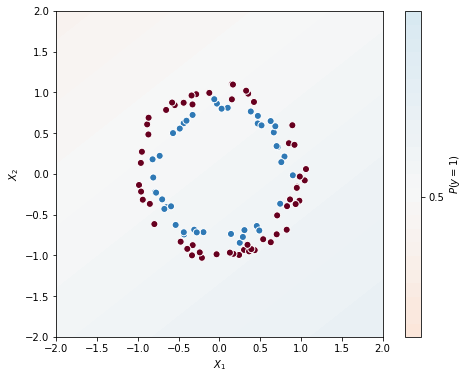

In [21]:
lgr_orig = LogisticRegression(fit_intercept=True, intercept_scaling=1, solver='lbfgs', random_state=0)
lgr_orig.fit(X_train,y_train)

lgr_orig_train_score = lgr_orig.score(X_train,y_train)
lgr_orig_test_score  = lgr_orig.score(X_test, y_test)

print("Train Score = ",lgr_orig_train_score)
print("Test  Score = ",lgr_orig_test_score)

# Plot Test Data
plot_log_reg_boundary(X_test,y_test,lgr_orig)

## Logistic Regression on Trigonometric Dataset

Train Score =  0.96875
Test  Score =  0.96


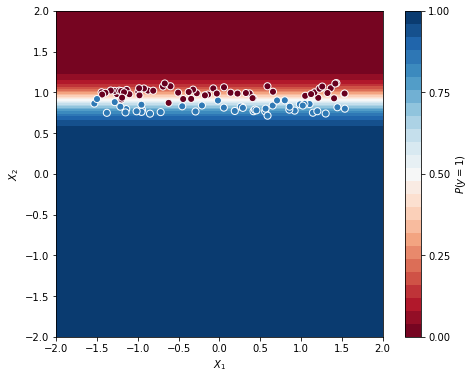

In [22]:
lgr_trig = LogisticRegression(fit_intercept=True, intercept_scaling=1, solver='liblinear', random_state=0)
lgr_trig.fit(X_trig_train,y_trig_train)

lgr_trig_train_score = lgr_trig.score(X_trig_train,y_trig_train)
lgr_trig_test_score  = lgr_trig.score(X_trig_test, y_trig_test)

print("Train Score = ",lgr_trig_train_score)
print("Test  Score = ",lgr_trig_test_score)

plot_log_reg_boundary(X_trig_test,y_trig_test,lgr_trig)

## Logistic Regression on Squared Dataset

Train Score =  0.9675
Test  Score =  0.975


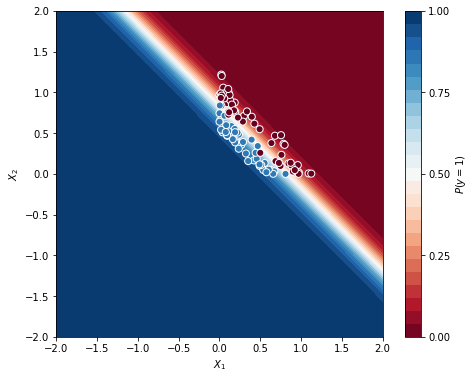

In [23]:
lgr_sqrd = LogisticRegression(fit_intercept=True, intercept_scaling=1, solver='liblinear', random_state=0)
#lgr_sqrd = LogisticRegression(fit_intercept=False, solver='liblinear', random_state=0)
lgr_sqrd.fit(X_sqrd_train,y_sqrd_train)

lgr_sqrd_train_score = lgr_sqrd.score(X_sqrd_train,y_sqrd_train)
lgr_sqrd_test_score  = lgr_sqrd.score(X_sqrd_test, y_sqrd_test)

print("Train Score = ",lgr_sqrd_train_score)
print("Test  Score = ",lgr_sqrd_test_score)

plot_log_reg_boundary(X_sqrd_test,y_sqrd_test,lgr_sqrd)

# Summary of Results

The following cells shows the accuracy score for both linear regression and logistic regression across the three datasets

In [24]:
print("\n************************************");
print("Linear Regression");
print("************************************");
print("------------------------------------");
print("Original Dataset");
print("------------------------------------");
print("Train Score = ",mlc_orig_train_score)
print("Test  Score = ",mlc_orig_test_score)

print("------------------------------------");
print("Trigonometric Dataset");
print("------------------------------------");
print("Train Score = ",mlc_trig_train_score)
print("Test  Score = ",mlc_trig_test_score)

print("------------------------------------");
print("Squared Dataset");
print("------------------------------------");
print("Train Score = ",mlc_sqrd_train_score)
print("Test  Score = ",mlc_sqrd_test_score)

print("\n************************************");
print("Logistic Regression");
print("************************************");
print("------------------------------------");
print("Original Dataset");
print("------------------------------------");
print("Train Score = ",lgr_orig_train_score)
print("Test  Score = ",lgr_orig_test_score)

print("------------------------------------");
print("Trigonometric Dataset");
print("------------------------------------");
print("Train Score = ",lgr_trig_train_score)
print("Test  Score = ",lgr_trig_test_score)

print("------------------------------------");
print("Squared Dataset");
print("------------------------------------");
print("Train Score = ",lgr_sqrd_train_score)
print("Test  Score = ",lgr_sqrd_test_score)


************************************
Linear Regression
************************************
------------------------------------
Original Dataset
------------------------------------
Train Score =  0.51125
Test  Score =  0.45499999999999996
------------------------------------
Trigonometric Dataset
------------------------------------
Train Score =  0.96875
Test  Score =  0.975
------------------------------------
Squared Dataset
------------------------------------
Train Score =  0.9675
Test  Score =  0.975

************************************
Logistic Regression
************************************
------------------------------------
Original Dataset
------------------------------------
Train Score =  0.51125
Test  Score =  0.455
------------------------------------
Trigonometric Dataset
------------------------------------
Train Score =  0.96875
Test  Score =  0.96
------------------------------------
Squared Dataset
------------------------------------
Train Score =  0.9675
Test

# Analysis of Results

* Performance Improvement with Trigonometric Dataset

  With the trigonometric dataset, test accuracy jumped to 97.5%. When plotted, you can see a horizontal decision boundary that splits the two classes.
  There are some noisy points that fall on the wrong side of the decision boundary and these account for the 3% error. These are irreducible errors
  
  
* Performance Improvement with Squared Dataset

  With the squared dataset, test accuracy jumped to 97.5%. The results look very like Figure 3.5 and Figure 3.5 in "Learning from Data". Once squared, the two classes become split on a diagonal line.
  When plotted, there are some noisy points that fall on the wrong side of the decision boundary and these account for the 2% test error. These are irreducible errors
  
  
* Logistic Regression Performance on Original Dataset

    The performance of logistic regression on the original dataset is just as bad as linear regression. It is interesting to compare the decision boundary plots for the two approaches. For linear regression the decision boundary almost looks like a tangent to the circular datasets.
    
    However, the plot of the logistic regression decision boundary is a cream color to indicate the the algorithm is giving a probability of approximately 0.5 for all points. This is a difference between linear regressiona and logisitic regression. Linear regression uses the sign of the result of the matrix operation to classify a point - this gives a hard decision boundary. A result cannot be a "bit" positive or "mostly" negative - it is one or the other. Logistic regression on the other hand generates a probability that a label is equal to 1. To classify, this probability needs to be round to 0 or 1 to become a label. However, the plot shows the probability and this illustrates how the algorithm has not been able to make a firm decision on any of the points (none of the plot is dark red or dark blue)

* Logistic Regression Performance on Trigonometric Dataset

    Logistic regression on the Trigonometric dataset gives 96% test accuracy - very comparable to using linear regression. This time on the plot you can see dark blue and dark red regions. This means that the algorithm is making high probability predictions on which class a point belongs to. This contrasts with the mostly cream color of the previous logistic regression plot. The algorithm is "more certain" when classifying the points when compared to the original dataset
    
    
* Logistic Regression Performance on Squared Dataset

    Logistic regression on the Sqaured dataset gives 97.5% test accuracy - again comparable to using linear regression. Similar to the logistic regression plots for the trigonometric dataset, the predictions are higher probability when compared to using the original dataset


* <b>Concluding Remarks</b>

  Using the trigonometric dataset was more of an experiment for myself to see what impact trying to "unroll" the circles would have. This was interesting to perform but it is not a general solution and only applies to this point case.

  The squared dateset, on the other hand, is a more general approach that could be applied to other datasets that are not circles and is the most valid approach in this notebook
  
  Linear regression gives a hard decision boundary whereas Logistic Regression can be used to get a probability of a prediction and can be used to asses the confidence of a prediction